In [1]:
from __future__ import division, print_function

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
from scipy import stats

In [5]:
stats.uniform.rvs()

0.15746212583242902

In [6]:
prng = np.random.RandomState(seed=1234)

Drawing samples from a distribution generated by a Dirichlet process
--

To generate samples from a distribution $G \sim D(\alpha, H)$, we follow a two-step process. We imagine we have an urn with colored balls, $n$ of them in total. To generate a new sample, with probability $\frac{1}{\alpha + n}$ we pick an existing ball from the urn, grab a new ball, paint it in the color of the existing ball, and drop both back in the urn. With probability $\frac{\alpha}{\alpha + n}$ we select a new color from the distribution $H$, paint a ball in that color, and drop it in the urn.

In [7]:
def draw_urn_sample(dist, previous, ranks, alpha):
    n = len(previous)
    s = prng.uniform()
    if s < alpha/(alpha + n):
        # pick a new color and drop a ball of that color into the urn
        sample = dist.rvs()
        idx = np.unique(previous).shape[0]
        return sample, idx
    else:
        # pick an existing ball from the urn
        idx = prng.choice(n)
        return previous[idx], ranks[idx]

In [8]:
def draw_urn_samples(dist, howmany, alpha):
    samples = []
    rank = []
    for _ in range(howmany):
        sample, rk = draw_urn_sample(dist, samples, rank, alpha)
        samples.append(sample)
        rank.append(rk)
    return np.asarray(samples), np.asarray(rank)

In [9]:
samples, rank = draw_urn_samples(stats.norm, 100, 0.9)

In [10]:
from collections import Counter

In [11]:
alphas = np.logspace(0, 2, 6)
samples = np.empty((len(alphas), 100), dtype=float)
ranks = np.empty((len(alphas), 100), dtype=int)
for n, alpha in enumerate(alphas):
    samples[n], ranks[n] = draw_urn_samples(stats.norm, 100, alpha)
    

In [12]:
def make_rug_plot(ax, samples):
    c = Counter(samples)
    for item, howmany in c.items():
        ax.plot((item, item), (0, howmany), 'k-')

In [13]:
def make_rank_plot(ax, ranks):
    c = Counter(ranks)
    for k in range(len(c)):
        ax.plot((k, k), (0, c[k]), 'k-')

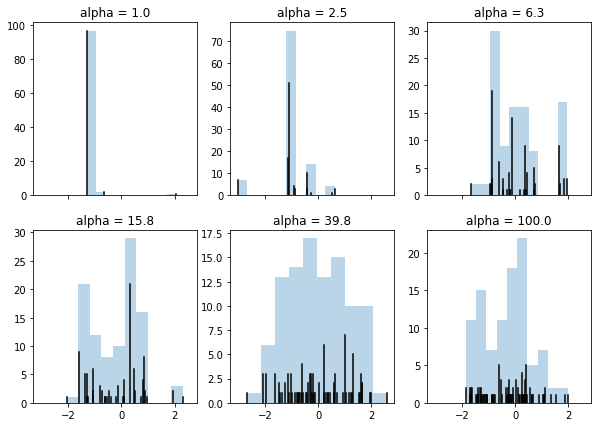

In [14]:
ncols = 3
nrows = int(np.ceil(len(alphas) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 7), sharex=True)
for ax, alpha, s, rk in zip(axes.ravel(), alphas, samples, ranks):
    ax.set_title("alpha = {:.01f}".format(alpha))
    ax.hist(s, alpha=0.3)
    make_rug_plot(ax, s)

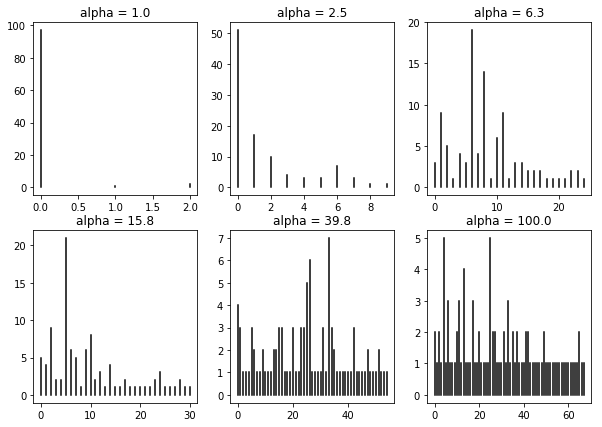

In [15]:
ncols = 3
nrows = int(np.ceil(len(alphas) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 7))
for ax, alpha, s, rk in zip(axes.ravel(), alphas, samples, ranks):
    ax.set_title("alpha = {:.01f}".format(alpha))
    make_rank_plot(ax, rk)